In [36]:
import random
import timeit 
import matplotlib.pyplot as plt
import numpy as np
import math

In [37]:
class Graph:

    # using hash map
    def __init__(self, edges):
        self.graph = {}
        for x,y in edges:
            if x not in self.graph.keys():
                self.graph[x]=[]
            self.graph[x].append(y)
            # undirected
            if y not in self.graph.keys():
                self.graph[y]=[]
            self.graph[y].append(x)

    def has_edge(self, src, dst):
        value = True if src in self.graph[dst] or dst in self.graph[src] else False
        return value
    
    def add_edge(self,node1, node2):
        if node1 not in self.graph.keys():
            self.graph[node1]=[]
        self.graph[node1].append(node2)
        if node2 not in self.graph.keys():
            self.graph[node2]=[]
        self.graph[node2].append(node1)

    def get_edges(self, node):
        return self.graph[node]

    def get_graph_size(self,):
        return len(self.graph)
    
    def get_nodes(self,):
        return self.graph.keys()
    
    def get_graph(self,):
        return self.graph
    
    # Part 1.3
    def has_cycle(self,):
        seen = set()
        onpath = [False] * self.get_graph_size()
        pathdepth = [0] * self.get_graph_size()
        for node in self.graph.keys():
            if node not in seen:
                if has_cycle_each(self, node, seen, onpath, pathdepth, 0):
                    return True
        return False
    
    # Part 1.4
    def is_connected(self,):
        seen = set()
        id = [-1] * self.get_graph_size()
        count = 0
        for node in self.graph.keys():
            if node not in seen:
                dfs_count(self, node, seen, id, count)
                count = count + 1
        for i in self.graph.keys():
            if id[i] != 0:
                return False
        return True
    
    # Part 1.5
    def add_node(self, node):
        if node not in self.graph.keys():
            self.graph[node] = []
            

Part 1.1

In [38]:

def BFS2(G, n1, n2):
    stack = [[n1]]
    graph = G.get_graph()
    seen = set()
    seen.add(n1)

    while len(stack) > 0:
        path = stack[0]
        node = path[-1]
        stack = stack[1:]
        for nn in graph[node]:
            if nn not in seen:
                new_path = list(path)
                new_path.append(nn)
                stack.append(new_path)
                seen.add(nn)
                if nn == n2:
                    return new_path

#g1 = Graph([[0,1],[1,2],[2,0],[3,2],[4,3],[5,4],[6,5]])
#print(BFS2(g1, 0, 6))

def DFS2(G, n1, n2):
    stack = [[n1]]
    graph = G.get_graph()
    seen = set()
    seen.add(n1)

    while len(stack) !=0:
        path = stack.pop()
        node = path[-1]
        for nn in graph[node]:
            if nn not in seen: 
                new_path = list(path)
                new_path.append(nn)
                stack.append(new_path)
                seen.add(nn)
                if nn == n2:
                    return new_path
#print(DFS2(g1, 0, 6))                

Part 1.2


In [39]:
def BFS3(G, node):
    stack = [node]
    graph = G.get_graph()
    seen = set()
    predecessor = {}
    seen.add(node)

    while len(stack) !=0:
        n1 = stack[0]
        stack = stack[1:]
        for nn in graph[n1]:
            if nn not in seen: 
                stack.append(nn)
                seen.add(nn)
                predecessor[nn] = n1
    return predecessor
#print(BFS3(g1,0))
def DFS3(G, node):
    stack = [node]
    graph = G.get_graph()
    seen = set()
    predecessor = {}
    seen.add(node)

    while len(stack) !=0:
        n1 = stack.pop()
        for nn in graph[n1]:
            if nn not in seen: 
                stack.append(nn)
                seen.add(nn)
                predecessor[nn] = n1
    return predecessor
#print(DFS3(g1,0))


Part 1.3

In [40]:
def has_cycle_each(G, node, seen, onpath, pathdepth, depth):
    graph = G.get_graph()
    depth = depth + 1
    seen.add(node)
    onpath[node] = True
    pathdepth[node] = depth

    for nn in graph[node]:
        if onpath[nn]:
            if pathdepth[nn] < depth - 1:
                return True
        if nn not in seen:
            result = has_cycle_each(G, nn, seen, onpath, pathdepth, depth)
            if result == True:
                return True
    onpath[node] = False
    return False

#print(g1.has_cycle())

Part 1.4

In [41]:
def dfs_count(G, node, seen, id, count):
    graph = G.get_graph()
    seen.add(node)
    id[node] = count
    for nn in graph[node]:
        if nn not in seen:
            dfs_count(G,nn,seen,id,count)
g2 = Graph([[0,1],[1,2],[2,3]])
#print(g2.is_connected())
    

Part 1.5

In [42]:
def create_random_graph(n,e):
    g = Graph([])
    graph = g.get_graph()
    for i in range(n):
        g.add_node(i)
    for _ in range(e):
        n1 = random.randint(0,n-1)
        n2 = random.randint(0,n-1)
        while n1 == n2 or n2 in graph[n1]:  # n1 and n2 are different
            n1 = random.randint(0,n-1)
            n2 = random.randint(0,n-1)
        g.add_edge(n1,n2)
    return g

g = create_random_graph(10,5)
#print(g.get_nodes())
#print(g.get_graph())

Part 1.6

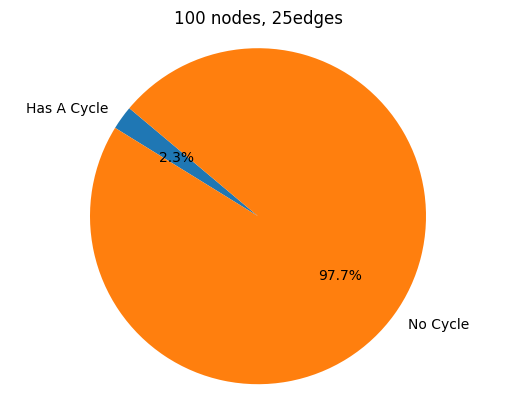

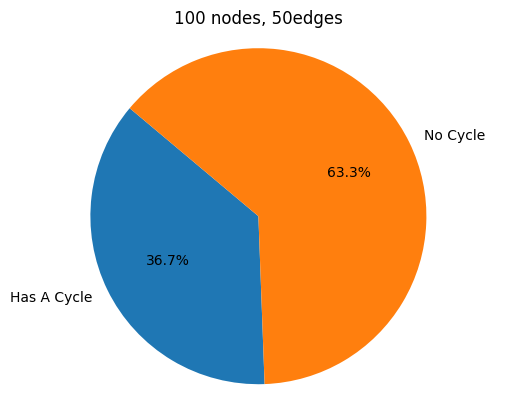

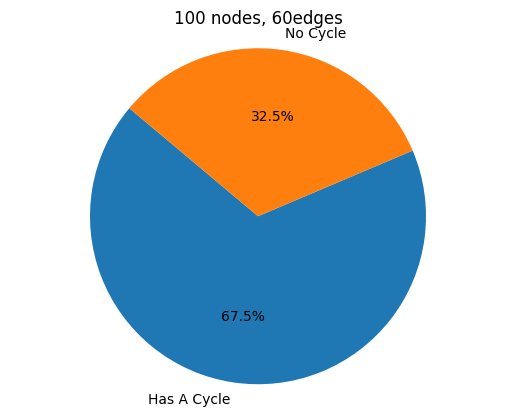

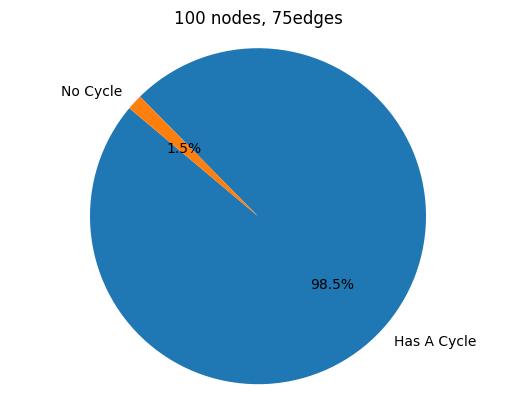

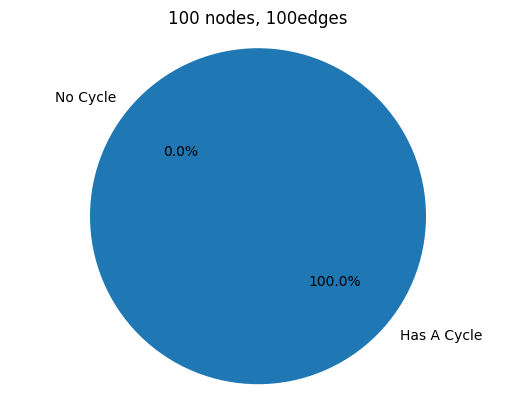

In [43]:
def has_cycle_exp(edge):
    runs = 1000
    count = 0
    for _ in range(runs):
        my_graph = create_random_graph(100,edge)
        if my_graph.has_cycle():
            count += 1
    plt.pie([count, runs - count], labels=["Has A Cycle", "No Cycle"], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('100 nodes, ' + str(edge) + 'edges')
    plt.show()
has_cycle_exp(25)
has_cycle_exp(50)
has_cycle_exp(60)
has_cycle_exp(75)
has_cycle_exp(100)

Reflections:
As I was conducting the experiment, I realized that the probability of a graph having a circle hugely depends on the number of edges. So, For a graph of 100 nodes, I ran 4 experiments for each different number of edges. Each experiment has 1000 iterations. As expected, a graph is more likely to have a cycle if it has more edges. When the graph has 75 edges, the probability almost reached 100%.

Part 1.7

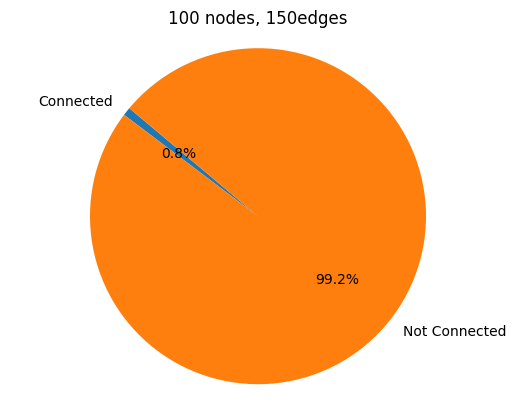

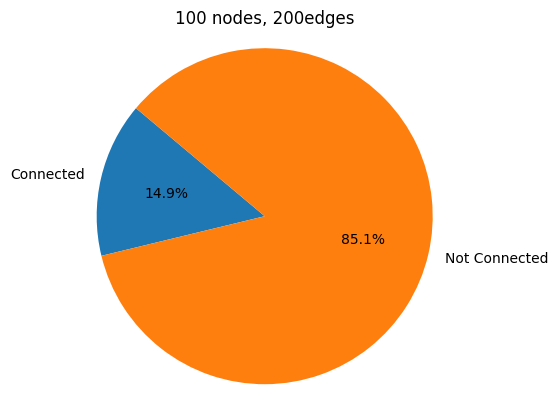

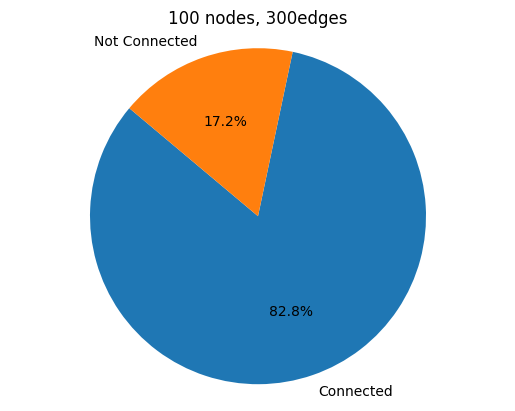

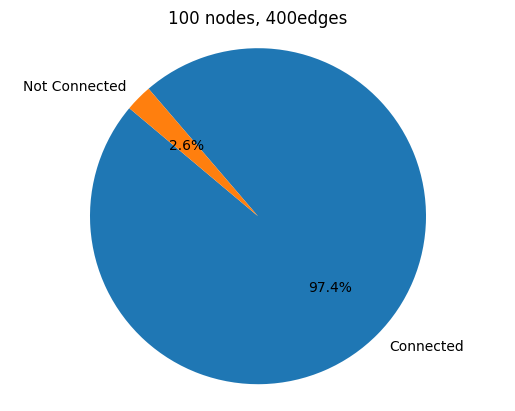

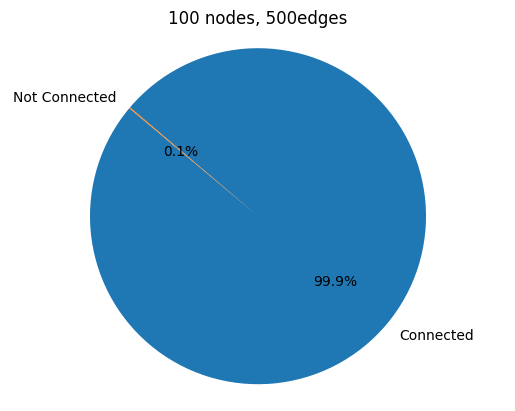

In [44]:
def is_connected_exp(edge):
    runs = 1000
    count = 0
    for _ in range(runs):
        my_graph = create_random_graph(100,edge)
        if my_graph.is_connected():
            count += 1
    plt.pie([count, runs - count], labels=["Connected", "Not Connected"], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('100 nodes, ' + str(edge) + 'edges')
    plt.show()
is_connected_exp(150)
is_connected_exp(200)
is_connected_exp(300)
is_connected_exp(400)
is_connected_exp(500)



Reflections:
As the part 1.6, I ran several expriments for each differennt number of edges to a graph of 100 nodes. Each experiment has 1000 iterations. This time, the number of edges had to increase a lot more to reach 100%. That means, the speed of the probability increasing is slower. This makes sense because of the fast that even one unconnected node can make a graph unconnected while one cycle can define a graph as having a cycle. At 150 edges, some connected graphs started appearing and at 500, almost exery graph was connected.